In [192]:
#Importing the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.figure_factory as ff
import networkx as nx
from pywaffle import Waffle 
from ipywidgets import interact, interact_manual
import plotly.offline as py

In [4]:
#Reading the dataset
data = pd.read_csv('employee.csv')
data.shape

(1470, 35)

In [5]:
# lets check the head of the dataset
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### Univariate Analysis on Numerical Variables

<Axes: xlabel='Age', ylabel='Density'>

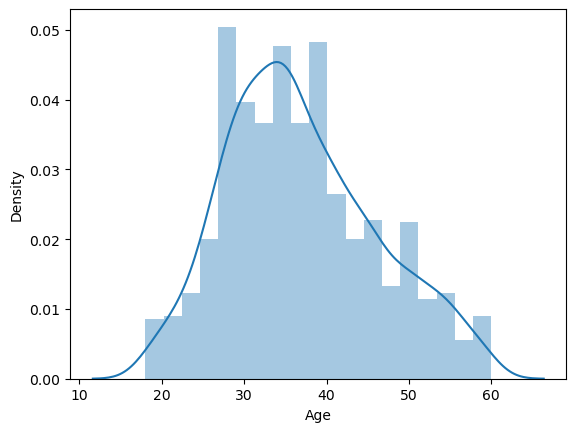

In [17]:
#Distributiong of Age variable
sns.distplot(data['Age'],kde=True)

<Axes: xlabel='Age', ylabel='Count'>

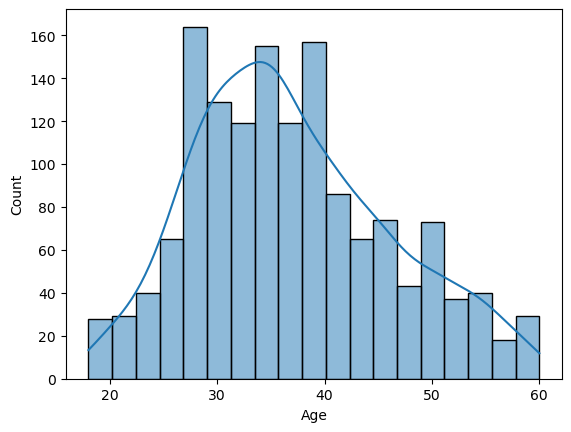

In [14]:
sns.histplot(data['Age'],kde=True)

### Univariate Analysis on Categorical Variables

<Axes: xlabel='BusinessTravel', ylabel='count'>

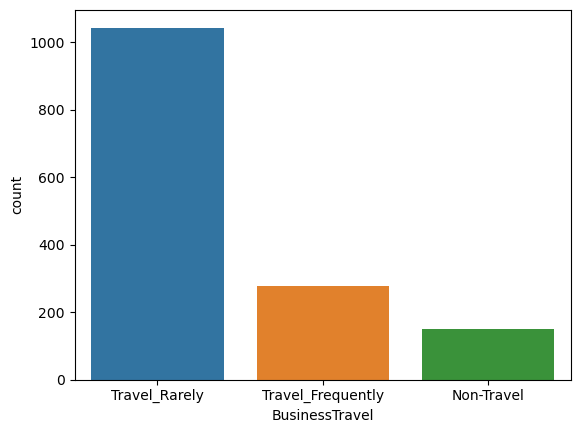

In [9]:
sns.countplot(x=data['BusinessTravel'],data=data)

### Bivariate Analysis

### Categorical vs Continuous Variables

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

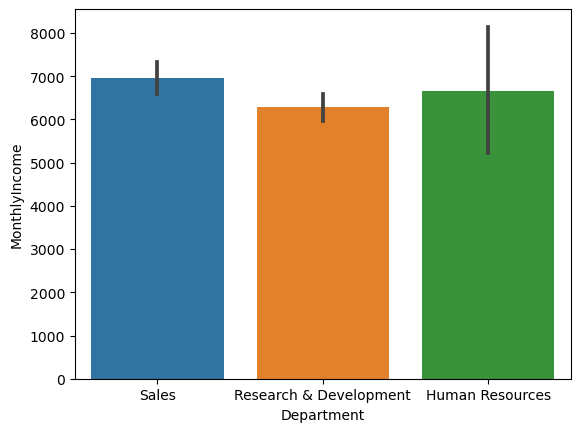

In [11]:
sns.barplot(x=data['Department'], y=data['MonthlyIncome'])

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

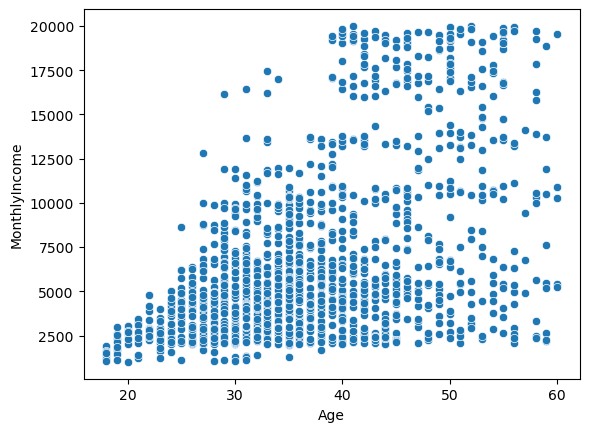

In [19]:
sns.scatterplot(x=data['Age'], y=data['MonthlyIncome'])

In [21]:
df=px.data.iris()

In [22]:
df.shape

(150, 6)

In [23]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

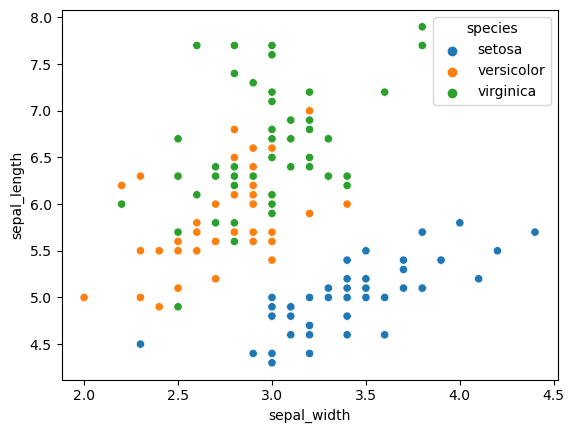

In [27]:
sns.scatterplot(x=df['sepal_width'], y=df['sepal_length'], hue = df['species'])

In [29]:
px.scatter(df, x="sepal_width", y="sepal_length", color="species")

In [31]:
px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin", marginal_x="box")

In [32]:
px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin", marginal_x="box", trendline="ols")

In [41]:
df[['species_id','species']].value_counts()

species_id  species   
1           setosa        50
2           versicolor    50
3           virginica     50
Name: count, dtype: int64

In [53]:
data = px.data.tips()

In [54]:
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [55]:
px.scatter(data,
           x="total_bill",
           y="tip")

In [56]:
px.scatter(data,
           x="total_bill",
           y="tip", 
           color="size")

In [57]:
px.scatter(data,
          x="total_bill",
          y="tip", 
          color="size", 
          color_continuous_scale=px.colors.sequential.Viridis)

In [58]:
px.bar(data, x="sex", y="total_bill", color="smoker", barmode="group")

In [59]:
px.bar(data, x="sex", y="total_bill", color="smoker",
       barmode="group",
       facet_row="time",
       facet_col="day",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})

In [60]:
px.scatter(data, x="tip", y="total_bill", color="smoker",
       facet_row="time",
       facet_col="day",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})

In [61]:
px.histogram(data, x="total_bill", y="tip", color="sex")

###### A strip plot is a type of scatter plot used to visualize the distribution of a categorical variable along a continuous axis. It displays all data points for each category, often used to understand the distribution and potential clustering within categories.

In [62]:
px.strip(data, x="total_bill", y="time", orientation="h")

In [63]:
px.strip(data, x="total_bill", y="time", orientation="h", color="smoker")

In [64]:
px.box(data, x="day", y="total_bill")

In [65]:
px.box(data, x="day", y="total_bill", color="smoker")

In [66]:
px.violin(data, y="tip", x="smoker", color="sex")

In [68]:
'''A violin plot is used to visualize the distribution of a continuous variable across different categories. 
It combines aspects of a box plot and a density plot, showing both the distribution shape and summary statistics.'''
px.violin(data, y="tip", x="smoker", color="sex", box=True, points="all")

In [73]:
data = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"])

In [74]:
data

{'number': [39, 27.4, 20.6, 11, 2],
 'stage': ['Website visit',
  'Downloads',
  'Potential customers',
  'Requested price',
  'invoice sent']}

In [75]:
px.funnel(data, x='number', y='stage')

In [76]:
import pandas as pd

stages = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"]
df_mtl = pd.DataFrame(dict(number=[39, 27.4, 20.6, 11, 3], stage=stages))
df_mtl['office'] = 'Montreal'

df_toronto = pd.DataFrame(dict(number=[52, 36, 18, 14, 5], stage=stages))
df_toronto['office'] = 'Toronto'

df = pd.concat([df_mtl, df_toronto], axis=0)
df

number                stage    office
0    39.0        Website visit  Montreal
1    27.4            Downloads  Montreal
2    20.6  Potential customers  Montreal
3    11.0      Requested price  Montreal
4     3.0         invoice sent  Montreal
0    52.0        Website visit   Toronto
1    36.0            Downloads   Toronto
2    18.0  Potential customers   Toronto
3    14.0      Requested price   Toronto
4     5.0         invoice sent   Toronto

In [77]:
px.funnel(df, x='number', y='stage', color='office')

### Multivariate Analysis

In [86]:
#Reading the dataset
data=pd.read_csv('employee.csv')
data.shape

(1470, 35)

In [83]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [89]:
data_numeric=data.select_dtypes(include=("float64","int64"))

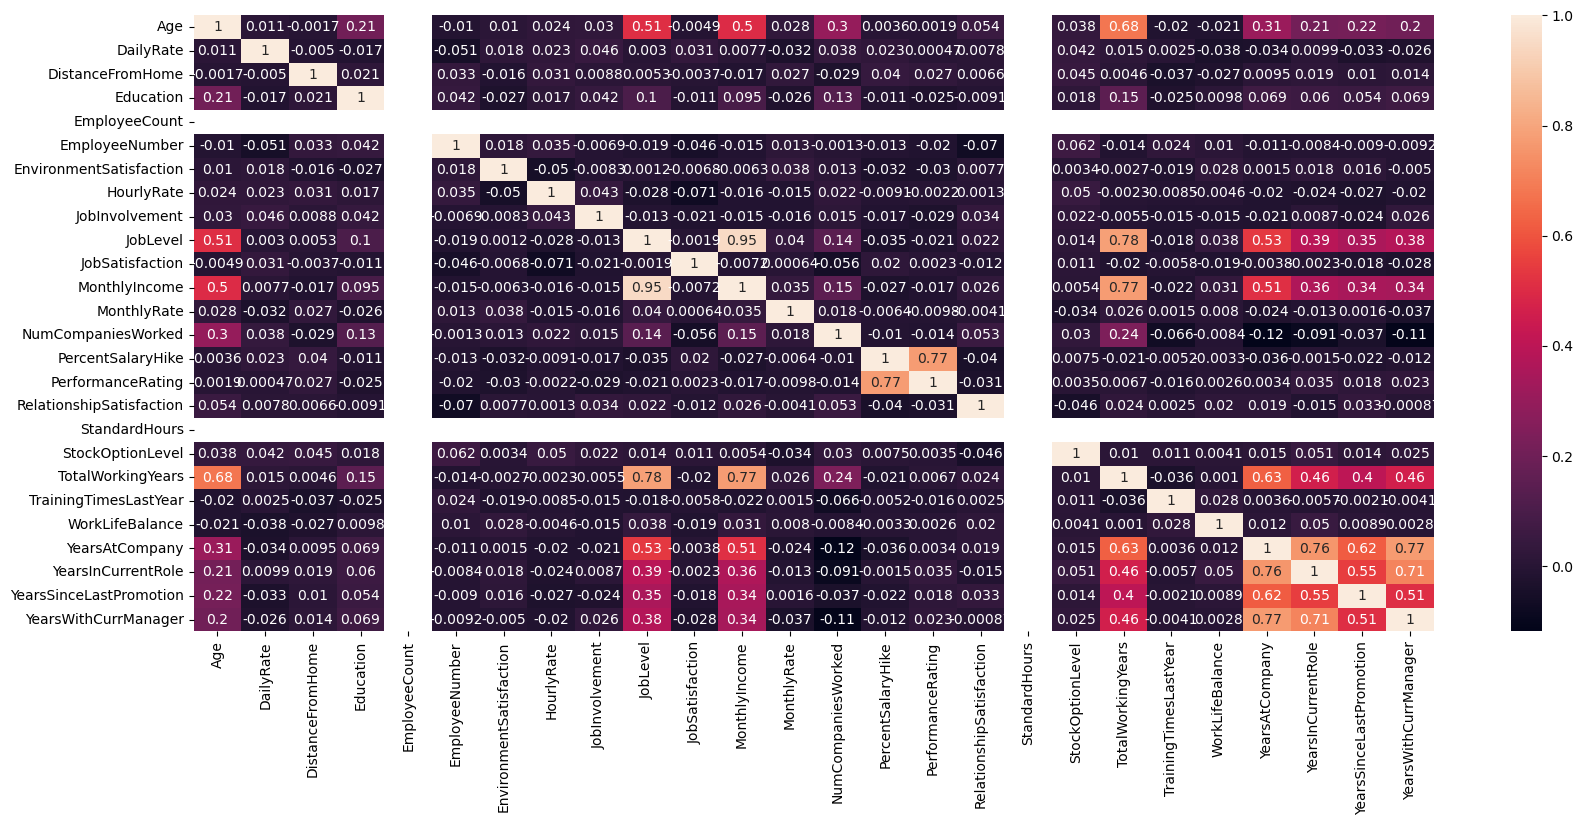

In [92]:
plt.figure(figsize=(20,8))
sns.heatmap(data_numeric.corr(),annot=True)
plt.show()

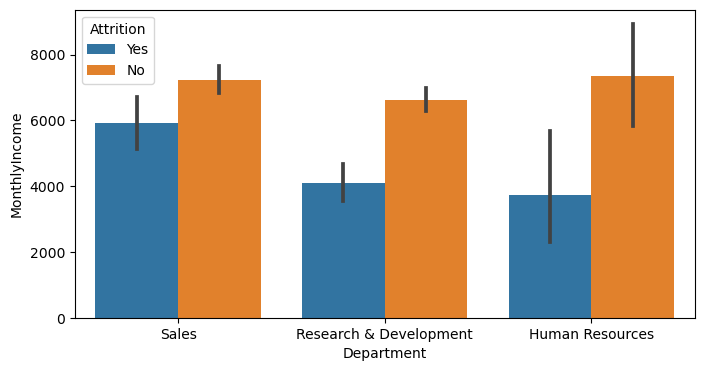

In [97]:
plt.figure(figsize=(8,4))
sns.barplot(x=data['Department'], y=data['MonthlyIncome'], hue=data['Attrition'],data=data)
plt.show()

In [99]:
df = [dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
      dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
      dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')]

fig = ff.create_gantt(df)
fig.show()

In [105]:
import plotly.figure_factory as ff

# Define the Gantt chart data
df = [dict(Task="Job-1", Start='2017-01-01', Finish='2017-02-02', Resource='Complete'),
      dict(Task="Job-1", Start='2017-02-15', Finish='2017-03-15', Resource='Incomplete'),
      dict(Task="Job-2", Start='2017-01-17', Finish='2017-02-17', Resource='Not Started'),
      dict(Task="Job-3", Start='2017-05-18', Finish='2017-06-18', Resource='Not Started'),
      dict(Task="Job-4", Start='2017-01-14', Finish='2017-03-14', Resource='Complete')]

# Define colors for different resources
colors = {'Not Started': 'rgb(220, 0, 0)',
          'Incomplete': 'rgb(255, 230, 41)',
          'Complete': 'rgb(0, 255, 100)'}

# Create the Gantt chart
fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True, group_tasks=True)

# Show the Gantt chart
fig.show()


In [108]:
df=px.data.iris()

In [109]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [123]:
px.scatter_ternary(df, a="sepal_length", b="sepal_width", c="petal_length")

In [127]:
px.scatter_ternary(df, a="sepal_length", b="sepal_width", c="petal_length",
                   color="species",
                   color_discrete_map = {"sepal_length": "blue", "sepal_width": "green", "petal_width":"red"} )

In [125]:
px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')

In [129]:
px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')

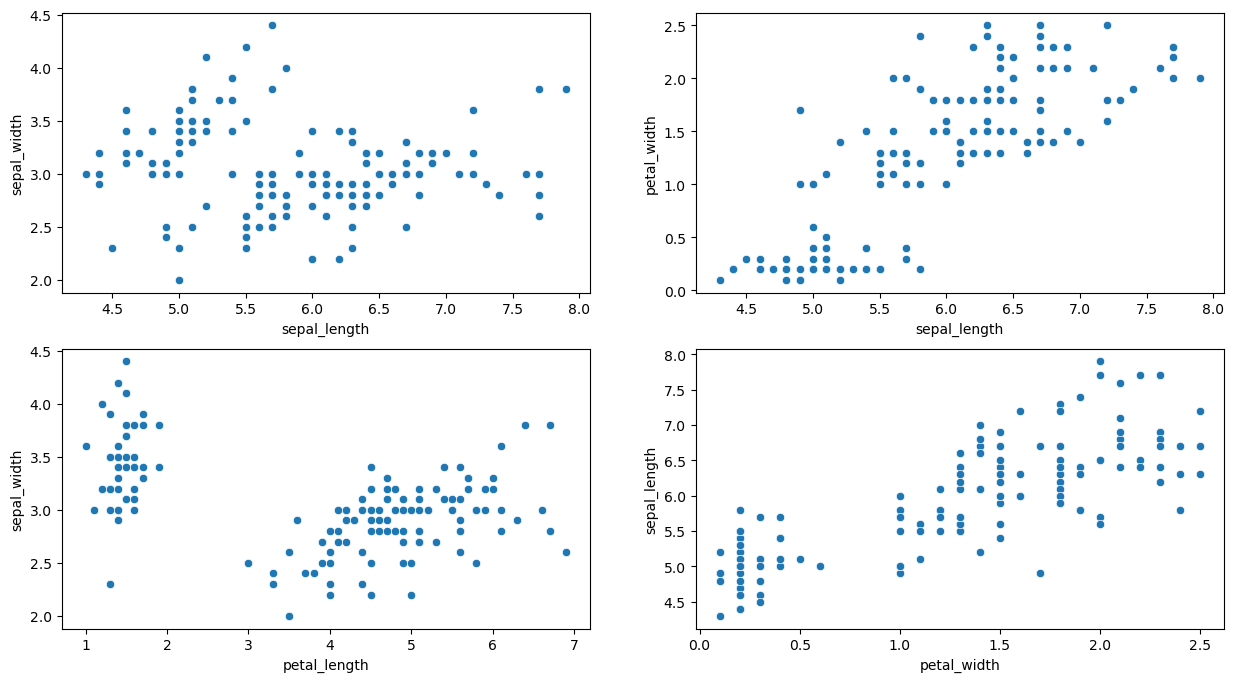

In [116]:
plt.rcParams['figure.figsize']=(15,8)

plt.subplot(2, 2, 1)
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'])

plt.subplot(2, 2, 2)
sns.scatterplot(x=df['sepal_length'], y=df['petal_width'])

plt.subplot(2, 2, 3)
sns.scatterplot(x=df['petal_length'], y=df['sepal_width'])

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['petal_width'], y=df['sepal_length'])
plt.show()

In [117]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")

fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=1, col=1)

fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)

fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
              row=2, col=2)

fig.show()

In [118]:
data = px.data.wind()
data.head()

direction strength  frequency
0         N      0-1        0.5
1       NNE      0-1        0.6
2        NE      0-1        0.5
3       ENE      0-1        0.4
4         E      0-1        0.4

In [119]:
px.scatter_polar(data, r="frequency", theta="direction")

In [120]:
px.scatter_polar(data, r="frequency", theta="direction", color="strength")

In [121]:
px.line_polar(data, r="frequency", theta="direction", color="strength")

In [122]:
px.bar_polar(data, r="frequency", theta="direction", color="strength")

In [130]:
data = px.data.tips()
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [131]:
px.treemap(data, path=['day'], values='total_bill')

In [132]:
px.treemap(data, path=['day', 'time',], values='total_bill')

In [133]:
px.treemap(data, path=['day', 'time', 'sex'], values='total_bill')

In [134]:
df = px.data.carshare()
df.head()

centroid_lat  centroid_lon    car_hours  peak_hour
0     45.471549    -73.588684  1772.750000          2
1     45.543865    -73.562456   986.333333         23
2     45.487640    -73.642767   354.750000         20
3     45.522870    -73.595677   560.166667         23
4     45.453971    -73.738946  2836.666667         19

In [135]:
px.scatter_mapbox(df, lat="centroid_lat",
                  lon="centroid_lon",
                  color="peak_hour",
                  size="car_hours",
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron")

In [136]:
df = px.data.gapminder()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [137]:
px.scatter_geo(df, locations="iso_alpha",
               color="continent",
               hover_name="country",
               size="pop",
               projection="natural earth")

In [146]:
df['nation'] = 'country'
df = nx.from_pandas_edgelist(df, source='nation', target='country', edge_attr=True)

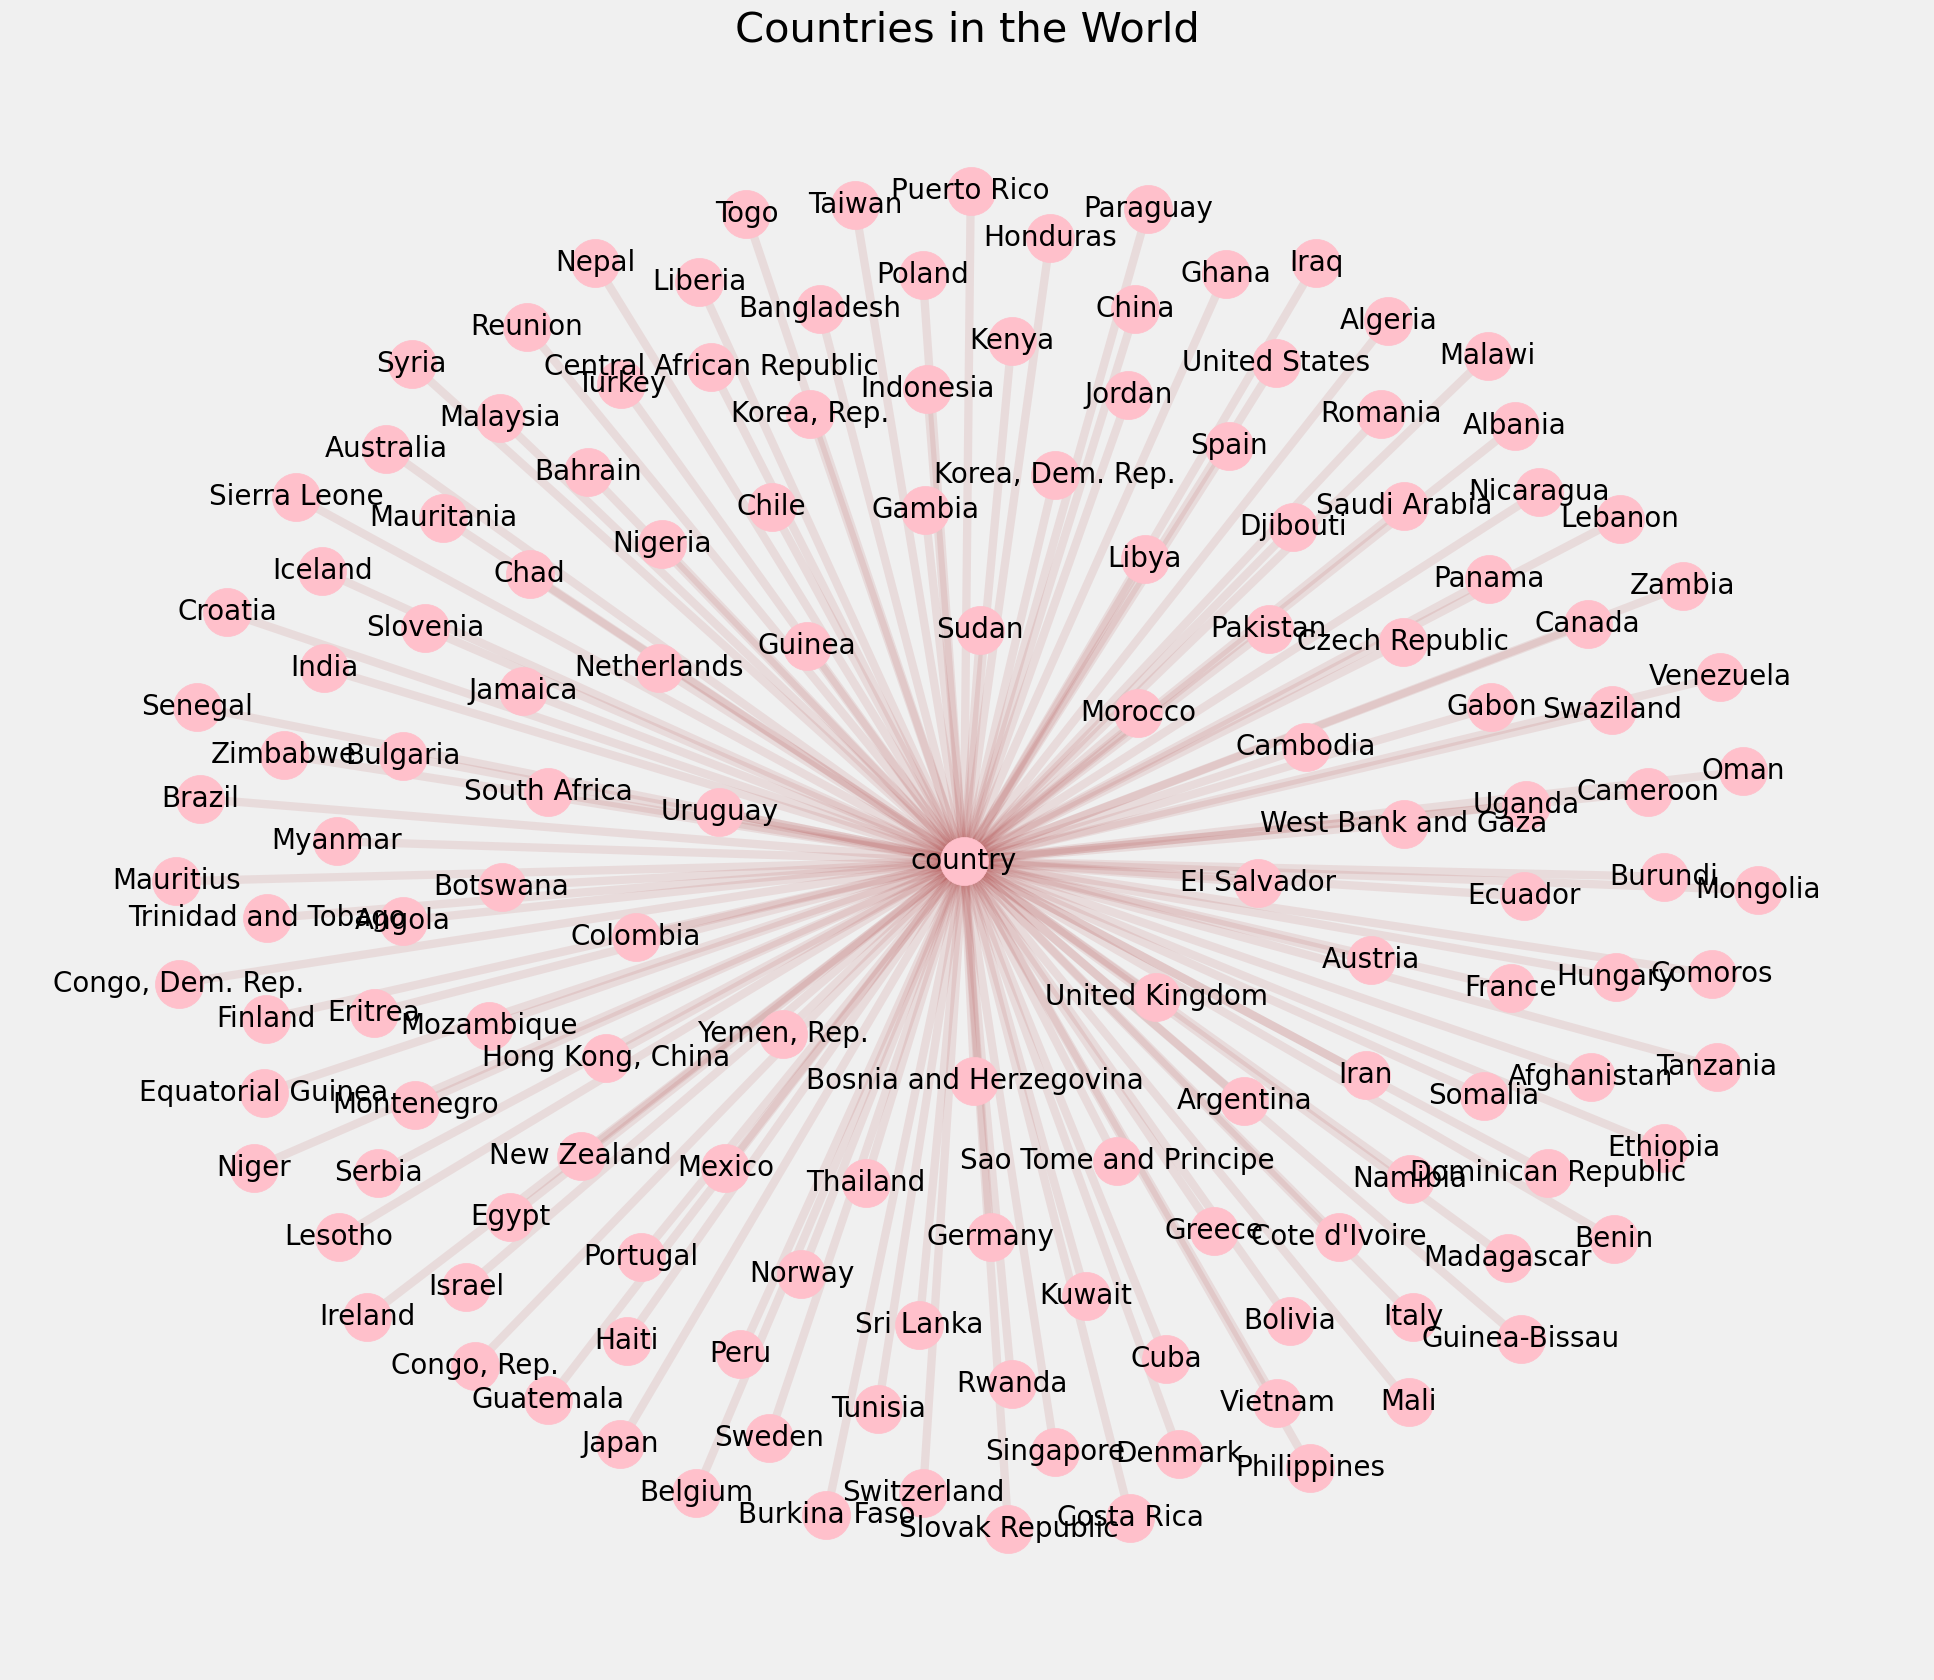

In [148]:
plt.rcParams['figure.figsize']  = (22, 20)
plt.style.use('fivethirtyeight')
plt.title('Countries in the World', fontsize = 30)
plt.grid()
plt.axis('off')

pos = nx.spring_layout(df)

# drawing nodes
nx.draw_networkx_nodes(df, pos, node_size = 1200, node_color = 'pink')

# labels
nx.draw_networkx_labels(df, pos, font_size = 20, font_family = 'sans-serif')

# drawing edges
nx.draw_networkx_edges(df, pos, width = 6, alpha = 0.1, edge_color = 'brown')


plt.show()

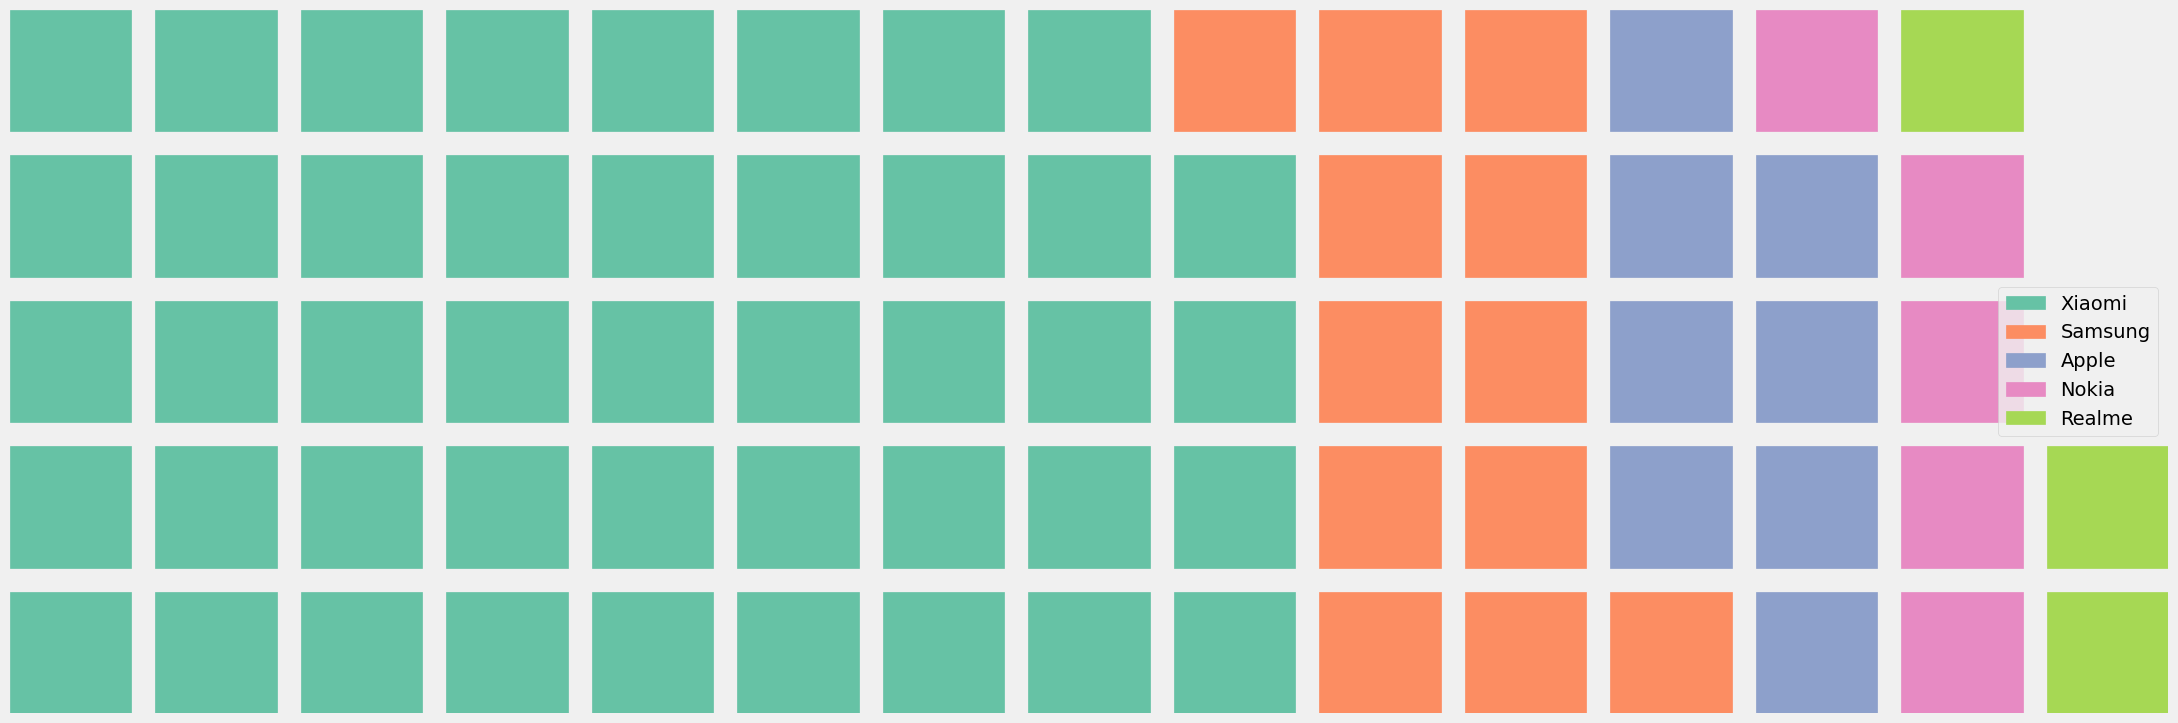

In [157]:

# creation of a dataframe 
data ={'phone': ['Xiaomi', 'Samsung', 
            'Apple', 'Nokia', 'Realme'], 
    'stock': [44, 12, 8, 5, 3] 
    } 

df = pd.DataFrame(data) 

# To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 5, 
    values = df.stock, 
    labels = list(df.phone) 
) 


In [168]:
# reading the dataset
data = px.data.gapminder()
data.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [162]:
# For Numerical Columns

@interact_manual
def viz(x = list(data.select_dtypes('number').columns)):
    sns.distplot(data[x],)

interactive(children=(Dropdown(description='x', options=('year', 'lifeExp', 'pop', 'gdpPercap', 'iso_num'), va…

In [164]:
# reading the dataset
data = px.data.tips()
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [166]:
# Multivariate Analysis

@interact_manual
def viz(x = list(data.select_dtypes('object').columns),
       y = list(data.select_dtypes('number').columns),
       hue = list(data.select_dtypes('object').columns[1:])):
    sns.barplot(x=data[x], y=data[y], hue = data[hue])

interactive(children=(Dropdown(description='x', options=('sex', 'smoker', 'day', 'time'), value='sex'), Dropdo…

In [167]:
@interact_manual
def viz(x = list(data.select_dtypes('object').columns),
       y = list(data.select_dtypes('number').columns),
       hue = list(data.select_dtypes('object').columns[1:]),
       palette = ['copper','magma','reds']):
    sns.barplot(x=data[x], y=data[y], hue = data[hue], palette = palette)

interactive(children=(Dropdown(description='x', options=('sex', 'smoker', 'day', 'time'), value='sex'), Dropdo…

In [171]:
# reading the dataset
data = px.data.gapminder()
px.scatter_geo(data, locations="iso_alpha",
               color="continent",
               hover_name="country",
               size="pop",
               animation_frame="year",
               projection="natural earth")

In [172]:
px.choropleth(data, locations="iso_alpha",
              color="lifeExp",
              hover_name="country",
              animation_frame="year",
              range_color=[20,80])

In [173]:
## Categorical vs Continous Variables

@interact_manual
def viz(x = list(data.select_dtypes('object').columns[1:]),
       y = list(data.select_dtypes('number').columns)[1:]):
    sns.barplot(x=data[x], y=data[y])

interactive(children=(Dropdown(description='x', options=('continent', 'iso_alpha'), value='continent'), Dropdo…

In [174]:
## Continous vs Continous Variables

@interact_manual
def viz(x = list(data.select_dtypes('number').columns),
       y = list(data.select_dtypes('number').columns)[1:]):
    sns.scatterplot(x=data[x], y=data[y])

interactive(children=(Dropdown(description='x', options=('year', 'lifeExp', 'pop', 'gdpPercap', 'iso_num'), va…

In [180]:
data = px.data.tips()
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [184]:
## Categorical vs Categorical Variables

@interact_manual
def viz(x = list(data.select_dtypes('object').columns),
       y = list(data.select_dtypes('object').columns)[1:]):
    pd.crosstab(data[x], data[y]).plot(kind = 'bar', stacked = True)

interactive(children=(Dropdown(description='x', options=('sex', 'smoker', 'day', 'time'), value='sex'), Dropdo…

In [185]:
px.sunburst(data, path=['sex','smoker'], values='total_bill')

In [186]:
px.sunburst(data, path=['day', 'time',], values='total_bill')

In [187]:
px.sunburst(data, path=['day', 'time','sex'], values='total_bill')

In [188]:
data = px.data.iris()
data.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [189]:
data.select_dtypes('number').head()

sepal_length  sepal_width  petal_length  petal_width  species_id
0           5.1          3.5           1.4          0.2           1
1           4.9          3.0           1.4          0.2           1
2           4.7          3.2           1.3          0.2           1
3           4.6          3.1           1.5          0.2           1
4           5.0          3.6           1.4          0.2           1

In [190]:
data.select_dtypes('object').head()

species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa

In [193]:
@interact
def correlation(x = list(data.select_dtypes('number').columns),
                y = list(data.select_dtypes('number').columns)):
    return data[x].corr(data[y])

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

In [194]:
@interact_manual
def correlation(x = list(data.select_dtypes('number').columns),
                y = list(data.select_dtypes('number').columns)):
    return data[x].corr(data[y])

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…